In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt

import pandas as pd
from pathlib import Path

### Data Info

The data is made up of 43 columns and 376,641 rows (first is the header).

Each row is a finished game of connect-4.

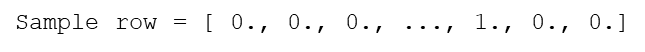

Columns 1-42 represent the positions on the board going from left to right, top to bottom.
Column 43 is the winner of the game

![game board data represantation](data_field_view.png)


Players are marked as 1 and -1, empty spaces or tie games are marked as 0.

![player values on field](data_sample.png)

## Read data

In [ ]:
data = pd.read_csv(r'connect4data\c4_game_database.csv', sep=',', header=None, skiprows=[0])

print(data) 
data.shape

## Data Cleaning
Remove faulty data, what shall be deleted?
(**Hint: dataframe.drop.....**)

In [ ]:
data = ???

## Extract the winner values (y_train)
Help for "Python Slice Notation": https://stackoverflow.com/a/509295/11341158

In [ ]:
# extract winner from data 
winner = data.values[???] # y_labels

# converts data to hot encoded array (keras needs this to classify, ML friendly format)
y_train = keras.utils.to_categorical(winner, num_classes=3) 
# [1 0 0] = tie (=0)
# [0 1 0] = bot loses  (=1)
# [0 0 1] = bot wins (=-1)
print(y_train)

## Extract the training data (x_train)
Extraxt the training data Data without the information about the winner (since we want to predict the winner)

Help for "Python Slice Notation": https://stackoverflow.com/a/509295/11341158

In [ ]:
x_train = data.values[???]
x_train

## Data Normalization
Normalize your data as seen in the presentation

In [ ]:
from sklearn.preprocessing import ???Scaler
scaler = ???Scaler()
x_train = scaler.fit_transform(x_train)
x_train

## Train the model

### Add layers

``` python
# model.add(keras.layers.Dense("amount of neurons", activation="activation function"))
model.add(keras.layers.Dense(10, activation='relu'))
```

### Train your model
``` python 
#sample: history = model.fit(x_train, y_train, validation_split=0.20, epochs=100, batch_size=1000, shuffle=True)
history = model.fit(x_train, y_train, validation_split=0.20, epochs=???, batch_size=???, shuffle=True)
```

In [ ]:
model = keras.Sequential()

In [ ]:
# input layer
model.add(keras.layers.Dense(??, activation='relu', input_shape=[??])) # ?? input features

# hidden layers, add more?
model.add(keras.layers.Dense(???, activation='relu'))

# output layer
model.add(keras.layers.Dense(?????, activation='softmax')) # ????? different outcomes 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# validation split = % of data we use as test set
history = model.fit(x_train, y_train, validation_split=0.20, epochs=??, batch_size=???, shuffle=True)

## Print history
See the difference between training accuracy and validation accuracy

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')

## Save the neural network

In [ ]:
# save the model weights
# H5 = Hierarchical Data Format
# https://en.wikipedia.org/wiki/Hierarchical_Data_Format
model.save("connect4predictor.H5")

## Optional: Some test cases...

In [ ]:
mymodel = keras.models.load_model("connect4predictor.H5")

In [ ]:
emptyfield = pd.DataFrame([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0,
  0.,  0.,  0.,  0.,  0.,  0.]])
emptyfield.shape

In [ ]:
empty_result = mymodel.predict(emptyfield.values)
print(empty_result)
print("predicted chance for tie:", empty_result[0,0]*100, "%")
print("predicted chance for loss:", empty_result[0,1]*100, "%")
print("predicted chance for win:", empty_result[0,2]*100, "%")
print("highest predicted chance was found at index", np.argmax(empty_result))

In [ ]:
corners = pd.DataFrame([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
  0.,  0.,  0.,  0.,  0.,  1.]])
corners.shape

In [ ]:
corner_result = mymodel.predict(corners.values)
print(corner_result)
print("predicted chance for tie:", corner_result[0,0]*100, "%")
print("predicted chance for loss:", corner_result[0,1]*100, "%")
print("predicted chance for win:", corner_result[0,2]*100, "%")
print("highest predicted chance was found at index", np.argmax(corner_result))